NAMA : Alwandia Ridwan Wadiska(149368779100-264)

# Challenge2 - Data Science

# IMPORT DATA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


# EDA

## READ DATA

In [ ]:
import pandas as pd
dtrain = pd.read_csv('/content/train.csv')
dtest = pd.read_csv('/content/test.csv')

df_train = dtrain.copy()
df_test = dtest.copy()

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750.0,375.500000,216.650640,1.00,188.2500,375.500,562.7500,750.00
account_length,750.0,100.385333,39.699029,1.00,74.0000,101.000,126.0000,238.00
number_vmail_messages,750.0,8.454667,14.123712,0.00,0.0000,0.000,21.0000,51.00
total_day_minutes,750.0,180.454933,53.258337,12.50,146.6250,178.200,215.9750,350.80
total_day_calls,750.0,100.721333,19.718539,39.00,88.0000,101.000,114.0000,163.00
total_day_charge,750.0,30.677920,9.053756,2.13,24.9250,30.295,36.7150,59.64
total_eve_minutes,750.0,203.258267,52.185471,31.20,166.8000,203.350,235.9750,363.70
total_eve_calls,750.0,100.273333,19.367535,37.00,87.0000,101.000,113.0000,164.00
total_eve_charge,750.0,17.277080,4.435638,2.65,14.1775,17.285,20.0575,30.91
total_night_minutes,750.0,199.619467,51.531351,50.90,164.4750,199.450,234.8000,364.30


## Missing Value

### Check

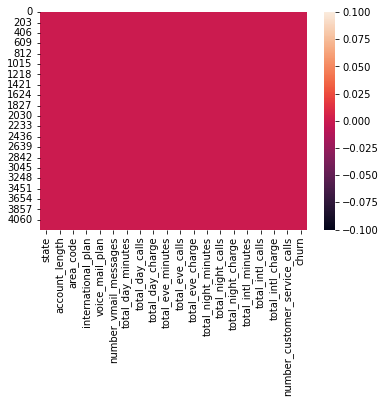

In [ ]:
import seaborn as sns

sns.heatmap(df_train.isna())

Pada Heatmap di atas terlihat **tidak terdapat** mising value pada data train

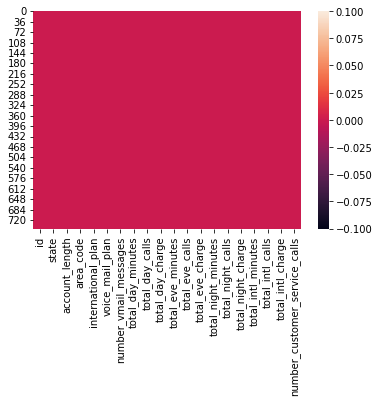

In [ ]:
sns.heatmap(df_test.isna())

Pada Heatmap di atas terlihat **tidak terdapat** mising value pada data test

In [ ]:
df_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Pada hasil di atas terlihat **tidak terdapat** jumlah mising value pada data train

In [ ]:
df_test.isna().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Pada hasil di atas terlihat **tidak terdapat** mising value pada data test

### Dropping

Dropping Missing value from column that not used

---> Semua fitur pada data train merupakan variabel independent yang mempengaruhi variabel dependent dan tidak terdapat nilai yang hilang sehingga tidak ada fitur yang dihilangkan atau didrop

In [ ]:
# df_train.drop(column=[''], inplace=True)

In [ ]:
# df_test.drop(column=[''], inplace=True)

In [ ]:
# df_train.isna().sum()

In [ ]:
# df_test.isna().sum()

### Filling

Filling data value from the column used based on median, mean, or modus

---> Dikarenakan tidak terdapat nilai yang hilang dan butuh diisi sehingga tidak ada fitur yang diisi baik berdasarkan median, mean, or mode

In [ ]:
# (all not edited yet)
# sns.boxplot(x="", y="", data=df_train, palette="winter")

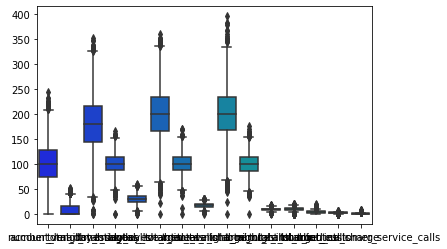

In [ ]:
sns.boxplot(data=df_train, palette="winter")

In [ ]:
# df_train.groupby('')[''].median()

In [ ]:
# sns.boxplot(x="", y="", data=df_test, palette="winter")

In [ ]:
# df_train[''] = df.apply(lambda x:?, axis=1)
# df_train[''].fillna(0, inplace=True)
# df_train[''].fillna(1, inplace=True)

# df_train[''].fillna(df['umur'].mean(), inplace=True)
# df_train[''].fillna(df_train[''].mode()[0], inplace=True)

In [ ]:
# fill by median
# def fill_value(col):
    
#     if pd.isnull(col[]):
#         if col[] == 1:
#             return 37
#         elif col[] == 2:
#             return 29
#         else:
#             return 24
#     else:
#         return col[]

In [ ]:
# df_train[""] = df_train[['', '']].apply(fill_value, axis=1)

In [ ]:
# df_test[""] = df_test[['', '']].apply(fill_value, axis=1)

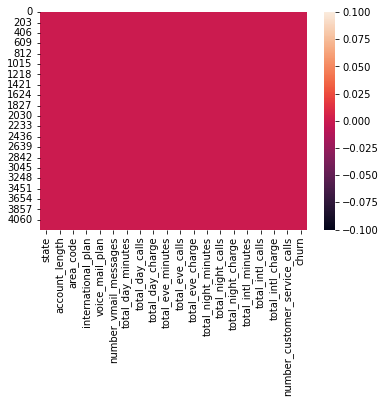

In [ ]:
sns.heatmap(df_train.isna())

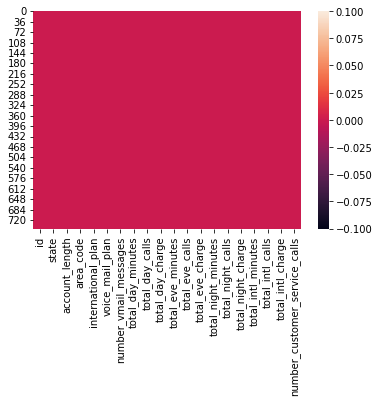

In [ ]:
sns.heatmap(df_test.isna())

## Duplicated Data

Mencari data duplikat dan menghilangkan/drop

---> Dikarenakan tidak ada data yang duplikat sehingga tidak perlu melakukan dropping data duplikat

In [ ]:
print(df_train.duplicated().sum())
# df_train.drop_duplicates(inplace=True)
# print(df_train.duplicated().sum())

0


In [ ]:
print(df_test.duplicated().sum())
# df_test.drop_duplicates(inplace=True)
# print(df_test.duplicated().sum())

0


## Data Exploring

### Visualization

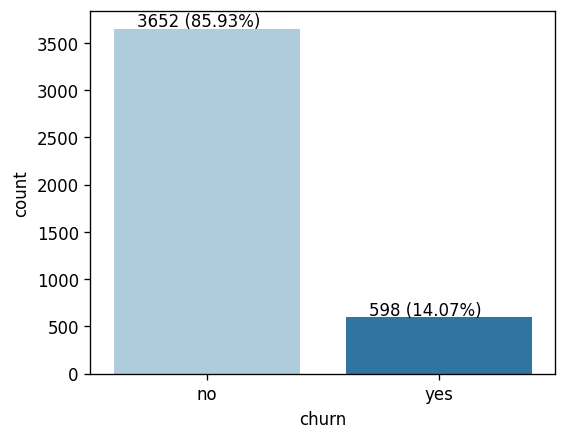

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4), dpi=120)
ax = sns.countplot(x=df_train['churn'], palette="Paired")

for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(df_train)), (p.get_x()+0.1, p.get_height()+20))


# for container in ax.containers:
#   ax.bar_label(container)

# import matplotlib
# print(matplotlib.__version__)

^^^ kostumer yang tidak beralih sebanyak 85.93% dan beralih sebanyak 14.07% dari total kostumer periode sebelumnya

Text(0.5, 1.0, '# Customer Churn for each area code')

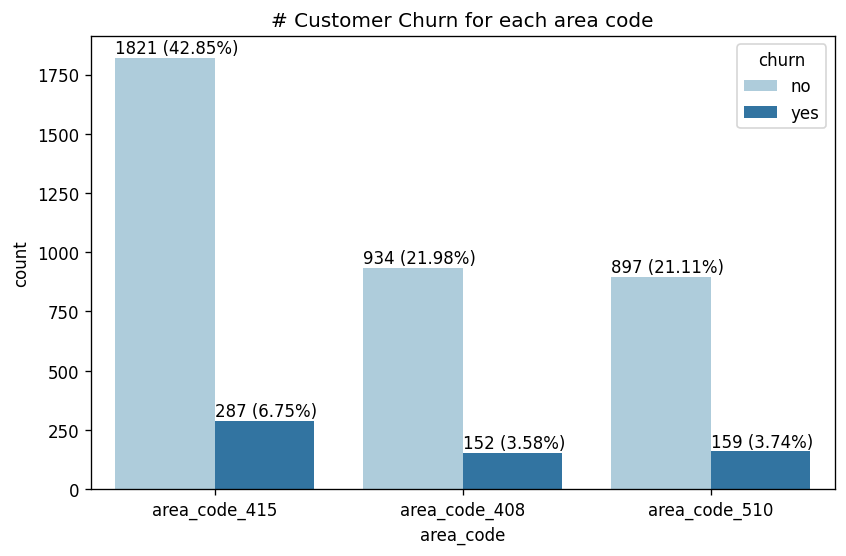

In [ ]:
plt.figure(figsize=(8,5), dpi=120)
ax = sns.countplot(data=df_train, x='area_code', hue='churn', palette="Paired")
for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(df_train)), (p.get_x(), p.get_height()+20))
ax.set_title("# Customer Churn for each area code")

In [ ]:
pct_yes_415 = (287/(287+1821))*100
pct_yes_408 = (152/(152+934))*100
pct_yes_510 = (159/(159+897))*100
print('percentase customer churn pada area code 415: %.2f%%'%pct_yes_415)
print('percentase customer churn pada area code 408: %.2f%%'%pct_yes_408)
print('percentase customer churn pada area code 510: %.2f%%'%pct_yes_510)

percentase customer churn pada area code 415: 13.61%
percentase customer churn pada area code 408: 14.00%
percentase customer churn pada area code 408: 15.06%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


Text(0.5, 1.5, '# Customer Churn')

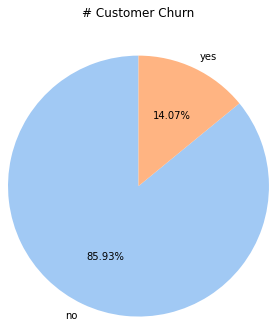

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
colors = sns.color_palette('pastel')

ax.pie(x=df_train['churn'].value_counts().to_frame().T, labels=['no', 'yes'], startangle=90, colors=colors, autopct='%.2f%%', radius=2)
ax.set_title("# Customer Churn", y=1.5)


^^^ visualisasi customer churn dalam bentuk pie chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.5, '# International Plan')

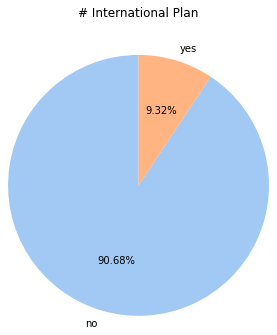

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
colors = sns.color_palette('pastel')
ax.pie(x=df_train['international_plan'].value_counts().to_frame().T, labels=['no', 'yes'], startangle=90, colors=colors, autopct='%.2f%%', radius=2)
ax.set_title("# International Plan", y=1.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.5, '# Voice Mail Plan')

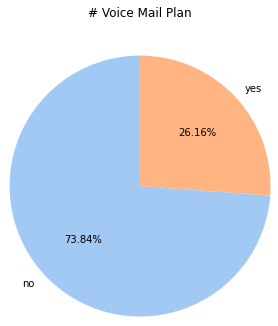

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
colors = sns.color_palette('pastel')
ax.pie(x=df_train['voice_mail_plan'].value_counts().to_frame().T, labels=['no', 'yes'], startangle=90, colors=colors, autopct='%.2f%%', radius=2)
ax.set_title("# Voice Mail Plan", y=1.5)

Text(0.5, 1.0, '# churn for each international plan')

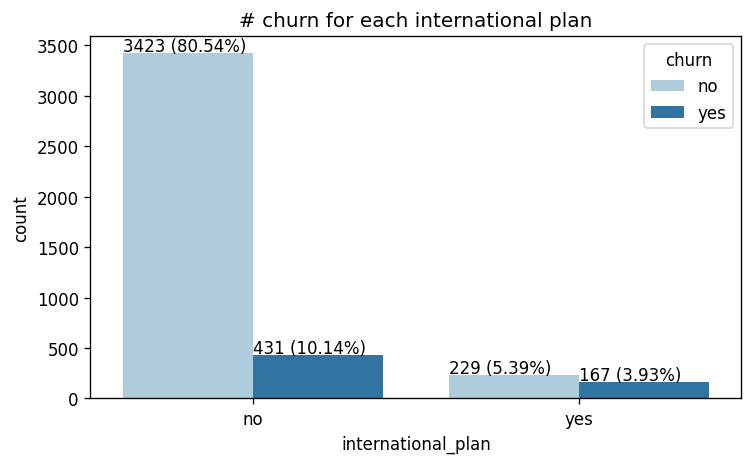

In [ ]:
plt.figure(figsize=(7,4), dpi=120)
ax = sns.countplot(data=df_train, x="international_plan", hue='churn', palette="Paired")
for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(df_train)), (p.get_x(), p.get_height()+20))
plt.title("# churn for each international plan")

In [ ]:
pct_no_intl = (431/(431+3423))*100
pct_yes_intl = (167/(167+229))*100
print('percentage customer churn pada no international plan: %.2f%%'%pct_no_intl)
print('percentage customer churn pada yes international plan: %.2f%%'%pct_yes_intl)

percentase customer churn pada no international plan: 11.18%
percentase customer churn pada yes international plan: 42.17%


Text(0.5, 1.0, '# churn for each voice mail plan')

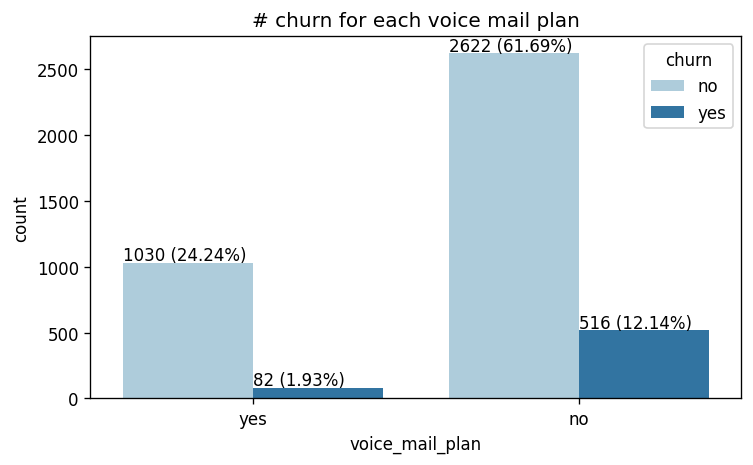

In [ ]:
plt.figure(figsize=(7,4), dpi=120)
ax = sns.countplot(data=df_train, x="voice_mail_plan", hue='churn', palette="Paired")
for p in ax.patches:
  ax.annotate('{:.0f} ({:.2f}%)'.format(p.get_height(), p.get_height()*100/len(df_train)), (p.get_x(), p.get_height()+20))
plt.title("# churn for each voice mail plan")

In [ ]:
pct_yes_vmp = (82/(82+1030))*100
pct_no_vmp = (516/(516+2622))*100
print('percentase customer churn pada no voice mail plan: %.2f%%'%pct_no_vmp)
print('percentase customer churn pada yes voice mail plan: %.2f%%'%pct_yes_vmp)

percentase customer churn pada no voice mail plan: 16.44%
percentase customer churn pada yes voice mail plan: 7.37%


### Data Distribution 

Text(0.5, 1.0, 'Day Calls distribution')

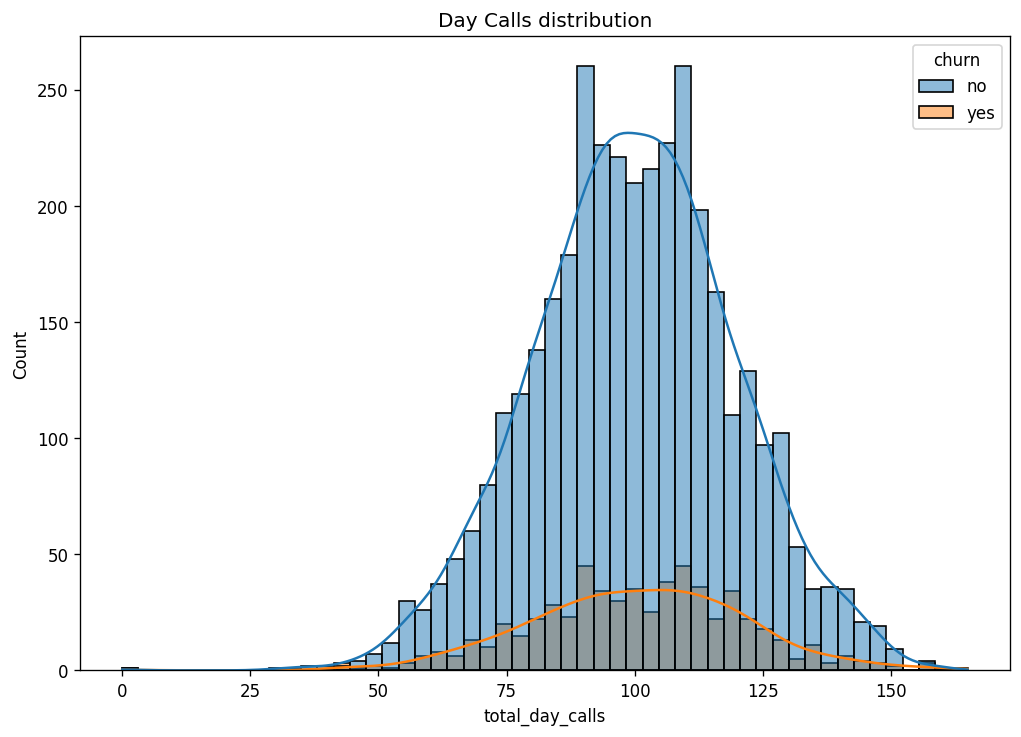

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
sns.histplot(data=df_train, x='total_day_calls', hue='churn', kde=True)
plt.title("Day Calls Distribution")

Text(0.5, 1.0, 'Evening Calls distribution')

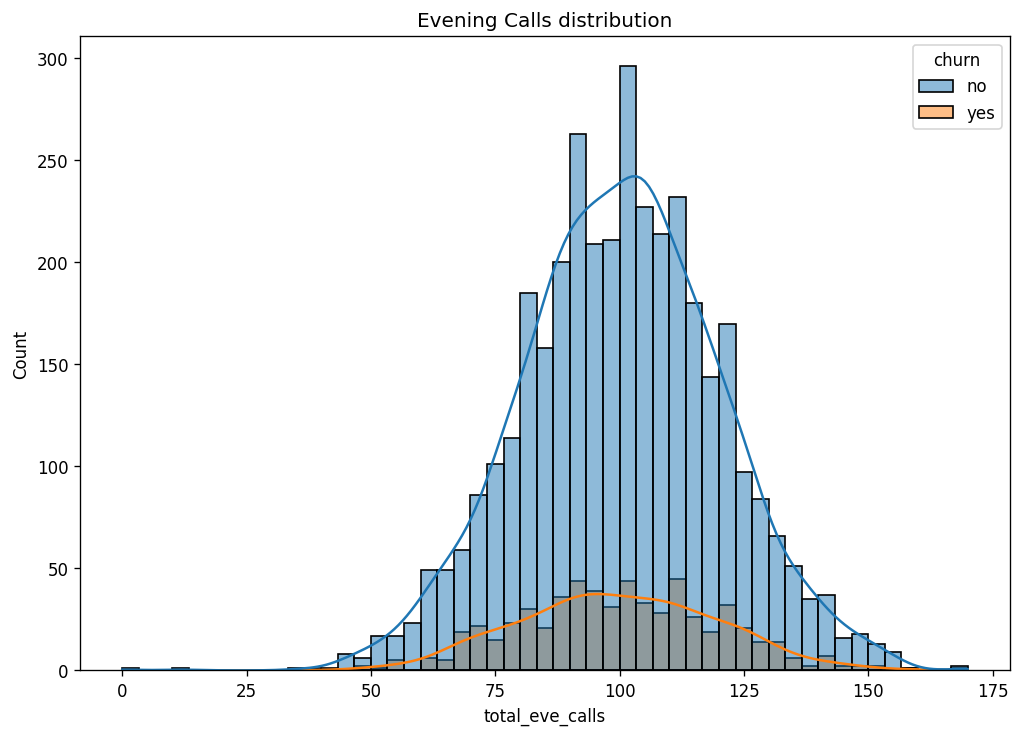

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
sns.histplot(data=df_train, x='total_eve_calls', hue='churn', kde=True)
plt.title("Evening Calls Distribution")

Text(0.5, 1.0, 'Night Calls distribution')

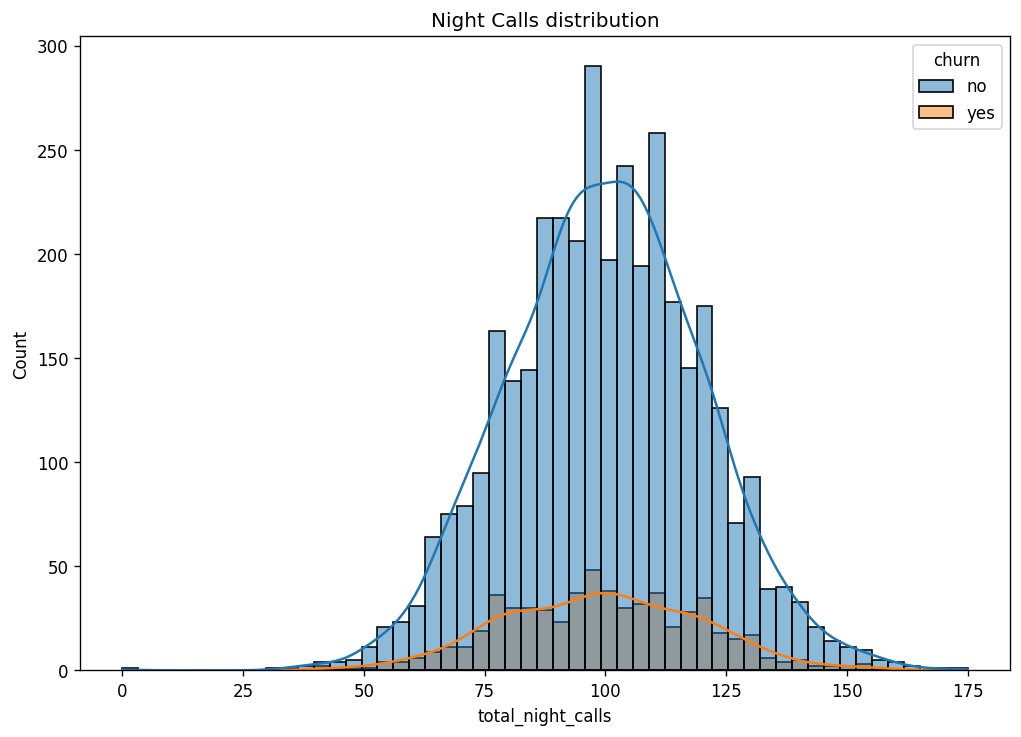

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
sns.histplot(data=df_train, x='total_night_calls', hue='churn', kde=True)
plt.title("Night Calls Distribution")

Text(0.5, 1.0, 'International Calls distribution')

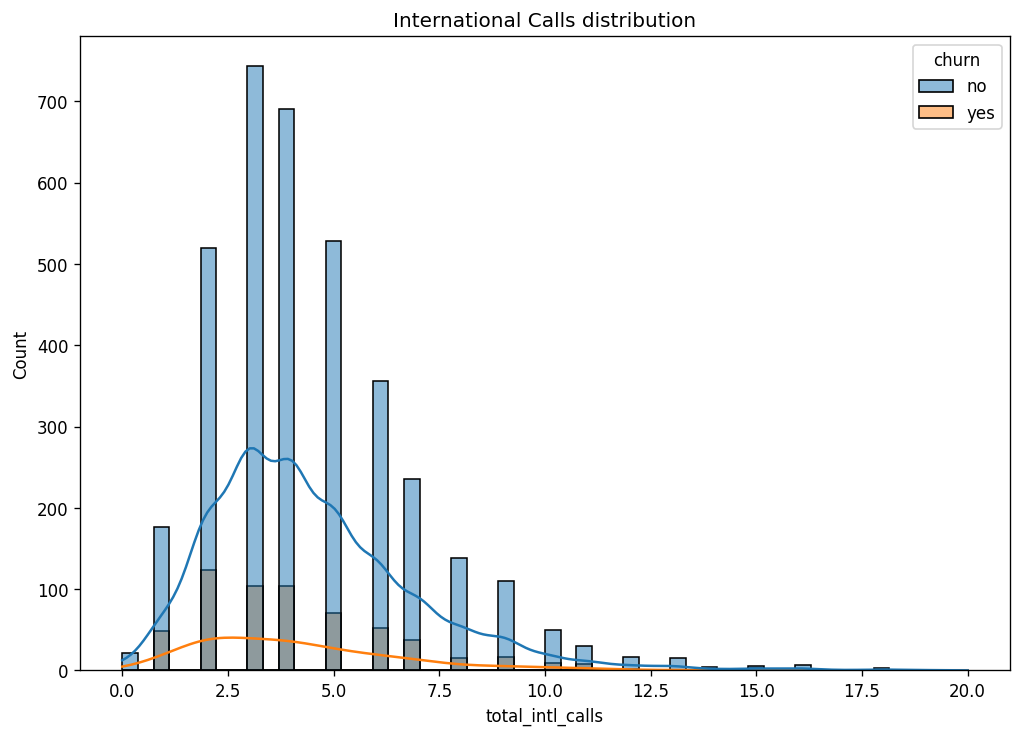

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
sns.histplot(data=df_train, x='total_intl_calls', hue='churn', kde=True)
plt.title("International Calls Distribution")

Text(0.5, 1.0, 'Total Voice Mail Messages distribution')

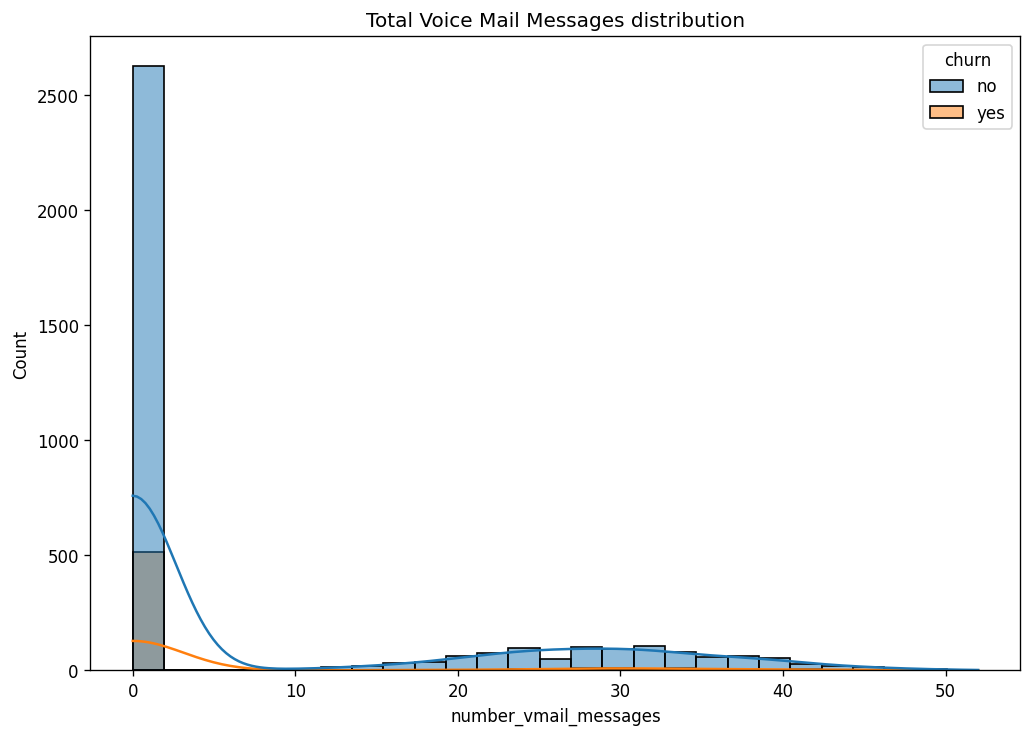

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
sns.histplot(data=df_train, x='number_vmail_messages', hue='churn', kde=True)
plt.title("Total Voice Mail Messages Distribution")
# plt.ylim(0, 500)

Text(0.5, 1.0, 'Account Length distribution')

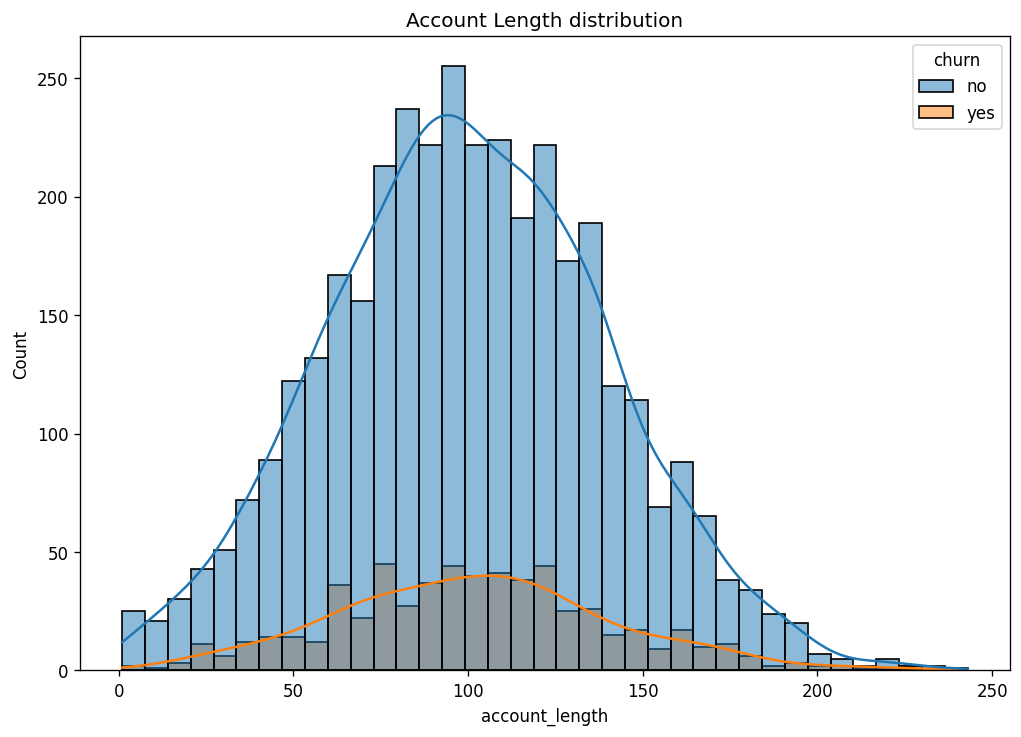

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
sns.histplot(data=df_train, x='account_length', hue='churn', kde=True)
plt.title("Account Length Distribution")

Text(0.5, 1.0, 'Day Calls distribution')

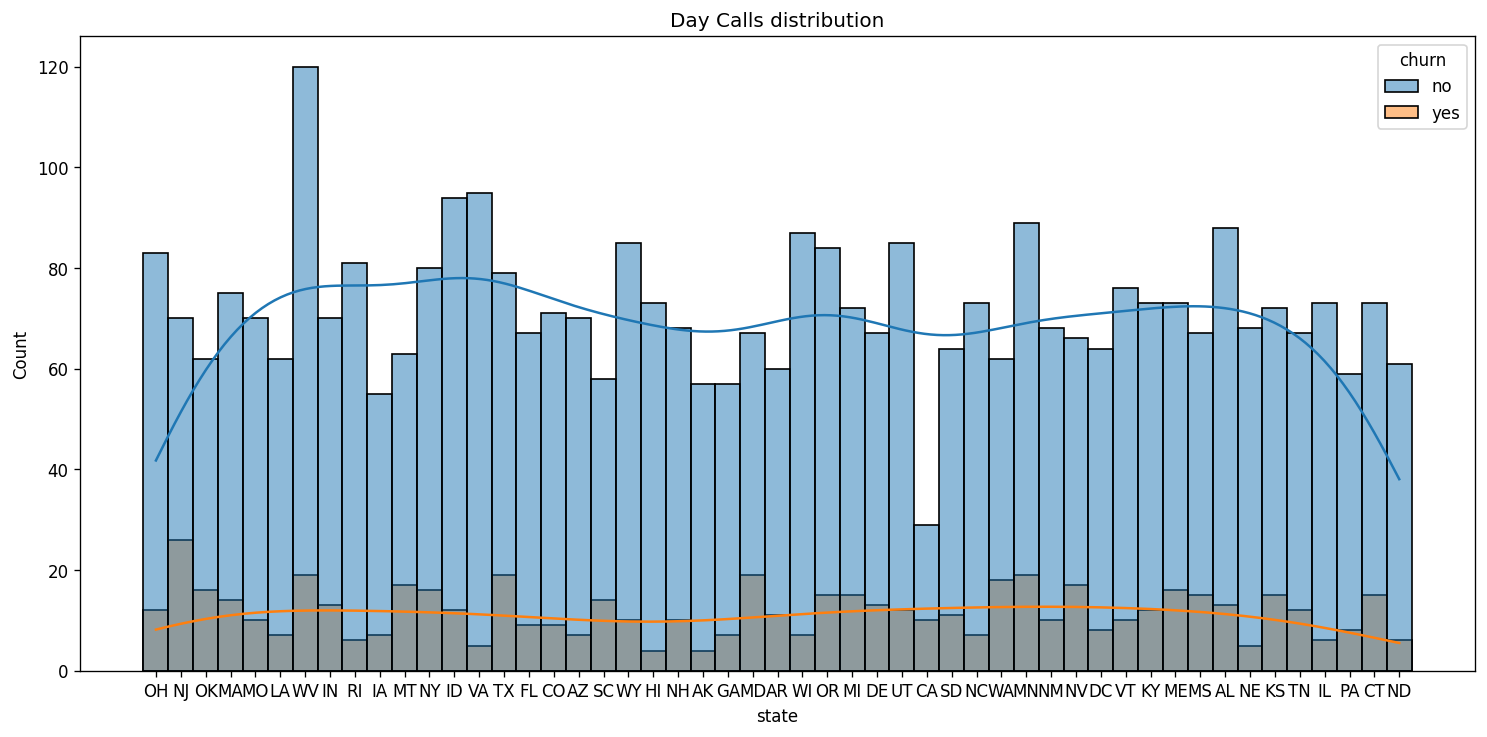

In [ ]:
plt.figure(figsize=(15,7), dpi=120)
sns.histplot(data=df_train, x='state', hue='churn', kde=True)
plt.title("State Distribution")

### Heatmap

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
from sklearn.preprocessing import LabelEncoder

churn_le = LabelEncoder()
intl_le = LabelEncoder()
vmail_le = LabelEncoder()
df_train['churn'] = churn_le.fit_transform(df_train['churn'])
df_train['international_plan'] = intl_le.fit_transform(df_train['international_plan'])
df_train['voice_mail_plan'] = vmail_le.fit_transform(df_train['voice_mail_plan'])

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


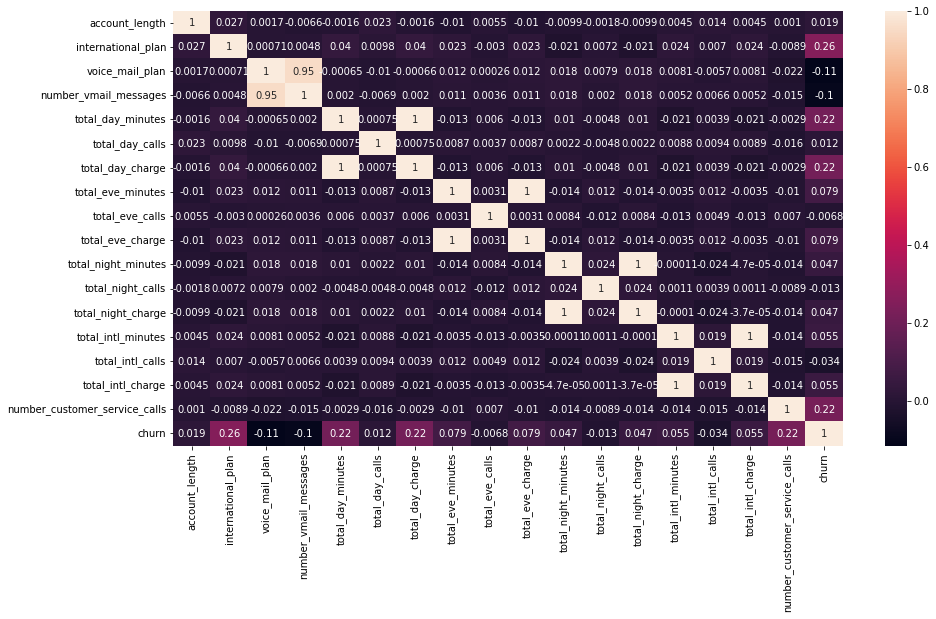

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

^^^ pada heatmap di atas terlihat positif relation antara churn dengan international plan, total_day_minutes, total_day_charge, dan number customer service calls

### RegPlot

---> dikarenakan pada heatmap total_day_charge dengan total_day_minutes memiliki hubungan positif satu atau linier, maka hasil regplot juga akan linier

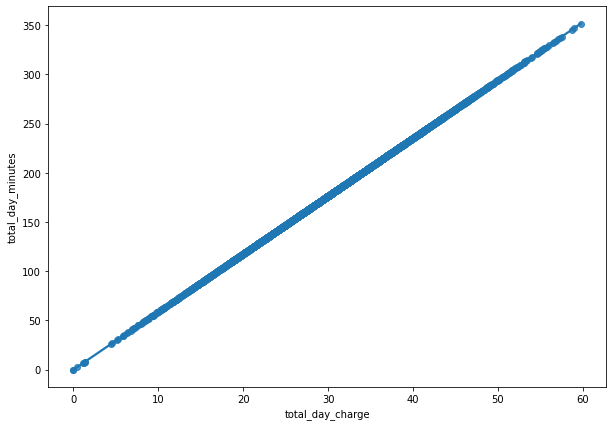

In [ ]:
plt.figure(figsize = (10,7))
sns.regplot(x='total_day_charge',y='total_day_minutes', data = df_train)
plt.show()

# DATA PREPROCESSING

## Encoding ()

In [ ]:
df_train = pd.get_dummies(df_train)

In [ ]:
df_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,1


## Outliers (IQR)

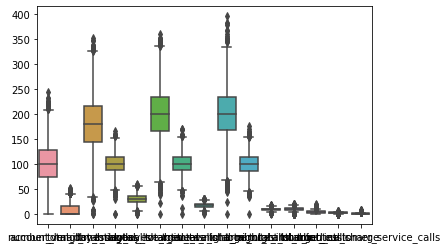

In [ ]:
num_cols = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 
                           'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
sns.boxplot(data=df_train[num_cols])

In [ ]:
import numpy as np
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


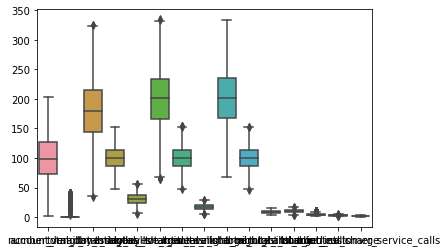

In [ ]:
sns.boxplot(data=df_train[num_cols])

## Drop Target Variable

In [ ]:
X = df_train.drop(['churn'], 1)
y = df_train['churn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [ ]:
X_transform = pd.DataFrame(X_transform,columns = X.columns)

In [ ]:
X_transform

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.522167,0.0,1.0,0.650,0.436920,0.721154,0.436805,0.484669,0.523364,0.484572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.669951,0.0,0.0,0.000,0.718116,0.634615,0.718099,0.210196,0.588785,0.209909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.364532,1.0,0.0,0.000,0.454452,0.625000,0.454398,0.310307,0.700935,0.310300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.719212,1.0,0.0,0.000,0.421107,0.298077,0.421031,0.143332,0.439252,0.142981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.689655,1.0,1.0,0.925,0.770368,0.346154,0.770273,0.582564,0.598131,0.582355,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510,0.684729,0.0,0.0,0.000,0.722585,0.644231,0.722548,0.717769,0.504673,0.717514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3511,0.403941,0.0,0.0,0.000,0.528704,0.211538,0.528615,0.663096,0.383178,0.662755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3512,0.354680,0.0,0.0,0.000,0.492953,0.394231,0.492821,0.247137,0.327103,0.246849,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3513,0.364532,0.0,0.0,0.000,0.468202,0.509615,0.468150,0.475803,0.738318,0.475445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_transform, y, test_size = 0.3, random_state = 42)

# Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors


from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score, precision_score

In [ ]:
model_list = []
accuracy_list = []
precision_list = []
f1_score_list= []
roc_auc_list = []

In [ ]:
def ML (alg, name_model): #y_train_alg, y_test_alg):
  
  alg_model = alg().fit(X_train, y_train)
  print(alg_model)
  y_train_alg = alg_model.predict(X_train)
  y_test_alg = alg_model.predict(X_test)

  pred(X_train, y_train, alg_model, 'Training', name_model, y_train_alg)
  pred(X_test, y_test, alg_model, 'Testing', name_model, y_test_alg)

  accuracy, precision, f1_s, roc_auc_sc= round(accuracy_score(y_test , y_test_alg) , 3) , round(precision_score(y_test , y_test_alg) , 3) , round(f1_score(y_test , y_test_alg) , 3), round(roc_auc_score(y_test, y_test_alg),3)
  print(f'Test Accuracy Score is :{accuracy}')
  print(f'Test Precision Score is :{precision}')
  print(f'f1  Score is :{f1_s}')
  print(f'ROC AUC Score is :{roc_auc_sc}')
  model_list.append(name_model)
  accuracy_list.append(accuracy)
  precision_list.append(precision)
  f1_score_list.append(f1_s)
  roc_auc_list.append(roc_auc_sc)
  return(alg_model)

In [ ]:
def pred (x_data, y_data, alg_model, type, name_model, y_pred_alg):

  # print classification report
  print('\nClassification Report %s' % type, ' Model:')
  print(classification_report(y_data, y_pred_alg))

  # form confusion matrix as a dataFrame
  confusion_matrix_alg = pd.DataFrame((confusion_matrix(y_data, y_pred_alg)), ('Not churn', 'churn'),('Not churn', 'churn'))

  # plot confusion matrix
  plt.figure()
  heatmap = sns.heatmap(confusion_matrix_alg, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

  plt.title('Confusion Matrix for %s Model \n%s '% (type,name_model),fontsize=18, color='black')
  plt.ylabel('True label', fontsize=14)
  plt.xlabel('Predicted label', fontsize=14)
  plt.show()

## Random Forest Classifier

RandomForestClassifier()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2204
           1       1.00      1.00      1.00       256

    accuracy                           1.00      2460
   macro avg       1.00      1.00      1.00      2460
weighted avg       1.00      1.00      1.00      2460



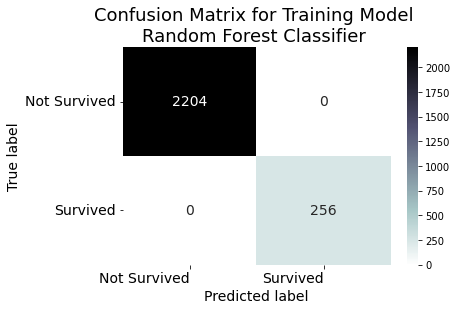


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.95      0.54      0.69       112

    accuracy                           0.95      1055
   macro avg       0.95      0.77      0.83      1055
weighted avg       0.95      0.95      0.94      1055



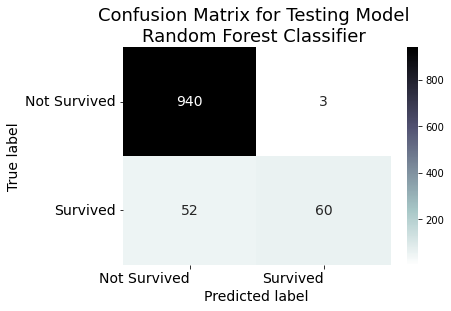

Test Accuracy Score is :0.948
Test Precision Score is :0.952
f1  Score is :0.686
ROC AUC Score is :0.766


In [ ]:
model_rf = ML(RandomForestClassifier, 'Random Forest Classifier')

## Logistic Regression

LogisticRegression()

Classification Report Training  Model:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2204
           1       0.77      0.34      0.47       256

    accuracy                           0.92      2460
   macro avg       0.85      0.67      0.72      2460
weighted avg       0.91      0.92      0.91      2460



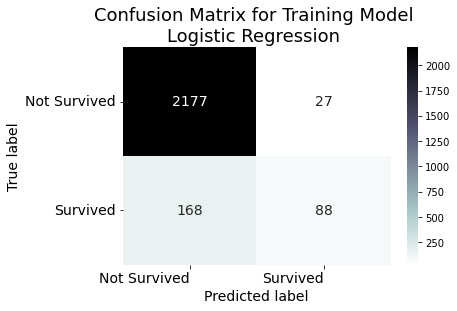


Classification Report Testing  Model:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       943
           1       0.63      0.34      0.44       112

    accuracy                           0.91      1055
   macro avg       0.78      0.66      0.70      1055
weighted avg       0.89      0.91      0.90      1055



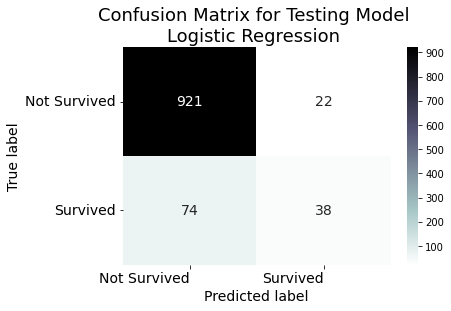

Test Accuracy Score is :0.909
Test Precision Score is :0.633
f1  Score is :0.442
ROC AUC Score is :0.658


In [ ]:
model_lr = ML(LogisticRegression, 'Logistic Regression')

# EVALUATION

In [ ]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list,'f1_score':f1_score_list , 'ROC_AUC_score':roc_auc_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df

,Model,Accuracy,Precision,f1_score,ROC_AUC_score
0,Random Forest Classifier,0.948,0.952,0.686,0.766
1,Logistic Regression,0.909,0.633,0.442,0.658


# TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'max_depth':[3,5,7,9,11,'max']} # hati-hati pemilihan hyperparameter jangan terlalu banyak kombinasinya
params_lr = {'C':[0.01,0.05,0.1,0.5,0.7,1,2,3]}

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier()
grid = GridSearchCV(
             estimator=lr,
             param_grid=params_lr,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

In [ ]:
print(rf.get_params().keys())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 0.7, 1, 2, 3]},
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 2}

In [ ]:
# membuat fungsi evaluasi model
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
evaluasi_model(grid,X_test,y_test)

0.9090047393364928